In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")

DATA_PATH = Path.cwd().parent / "data" / "processed" / "credit_default_clean.csv"
df = pd.read_csv(DATA_PATH)

df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df["default"].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

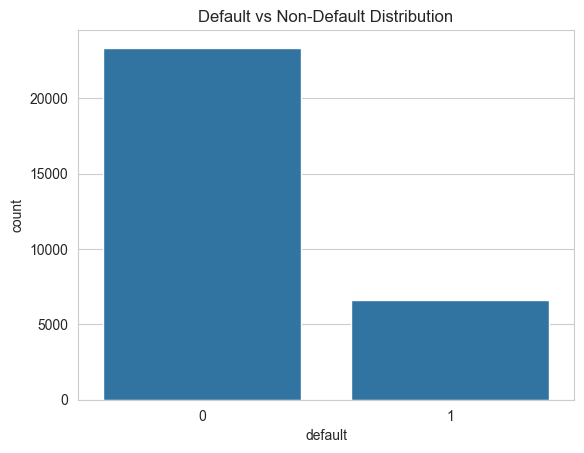

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="default", data=df)
plt.title("Default vs Non-Default Distribution")
plt.show()

The dataset is moderately class-imbalanced, reflecting real-world credit portfolios. This motivates the use of recall- and ROC-AUC–based evaluation rather than accuracy.

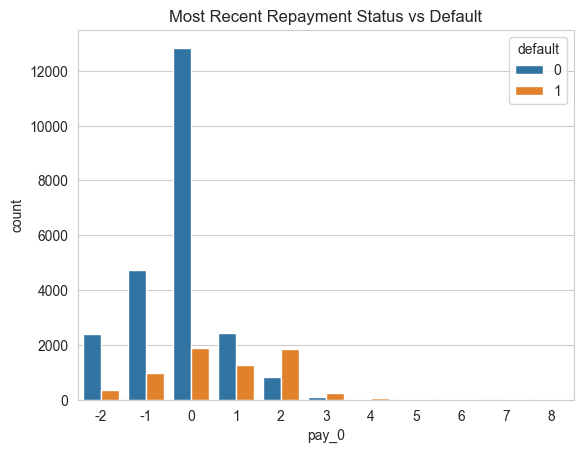

In [14]:
sns.countplot(x="pay_0", hue="default", data=df)
plt.title("Most Recent Repayment Status vs Default")
plt.show()

Repayment status variables (PAY_0, PAY_2, PAY_3) show a strong monotonic relationship with default. Longer delays are associated with sharply higher default rates.



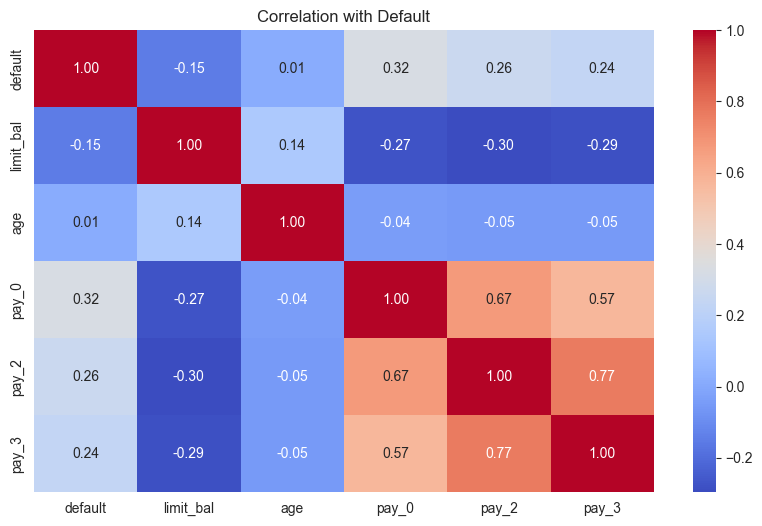

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[["default", "limit_bal", "age", "pay_0", "pay_2", "pay_3"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation with Default")
plt.show()

***EDA SUMMARY***

- A default rate of ~22% is seen, indicating a class imbalance.
- Repayment history is a strong predictor
- Credit limit has an inverse relationship with default
- Demographics standalone cannot be used as a strong predictor
- Behavioral data dominates risk prediction
